In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from apicall import predict

In [23]:
req=requests.get("https://codeforces.com/api/user.status?handle=ddevili")
r=req.json()
df=pd.json_normalize(r['result'])

In [24]:
df

,id,contestId,creationTimeSeconds,relativeTimeSeconds,programmingLanguage,verdict,testset,passedTestCount,timeConsumedMillis,memoryConsumedBytes,...,problem.type,problem.points,problem.rating,problem.tags,author.contestId,author.members,author.participantType,author.ghost,author.startTimeSeconds,author.room
0,125081672,959,1628274137,2147483647,GNU C++17,WRONG_ANSWER,TESTS,0,0,7270400,...,PROGRAMMING,1000.0,1200,"[dsu, greedy, implementation]",959,[{'handle': 'ddevili'}],PRACTICE,False,1522771500,NaN
1,124979069,490,1628180315,2147483647,GNU C++17,TIME_LIMIT_EXCEEDED,TESTS,46,2000,27340800,...,PROGRAMMING,1000.0,1500,"[dsu, implementation]",490,[{'handle': 'ddevili'}],PRACTICE,False,1416733800,NaN
2,124975439,490,1628178077,2147483647,GNU C++17,WRONG_ANSWER,TESTS,2,15,4096000,...,PROGRAMMING,1000.0,1500,"[dsu, implementation]",490,[{'handle': 'ddevili'}],PRACTICE,False,1416733800,NaN
3,124947267,1055,1628160942,2147483647,GNU C++17,OK,TESTS,47,577,4915200,...,PROGRAMMING,1000.0,1300,"[dsu, implementation]",1055,[{'handle': 'ddevili'}],PRACTICE,False,1541860500,NaN
4,124947092,1055,1628160808,2147483647,GNU C++17,WRONG_ANSWER,TESTS,1,15,4915200,...,PROGRAMMING,1000.0,1300,"[dsu, implementation]",1055,[{'handle': 'ddevili'}],PRACTICE,False,1541860500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,113758264,1516,1619015553,3453,GNU C++14,WRONG_ANSWER,PRETESTS,1,31,0,...,PROGRAMMING,500.0,800,[greedy],1516,[{'handle': 'ddevili'}],CONTESTANT,False,1619012100,333.0
256,113753896,1516,1619015101,3001,GNU C++14,WRONG_ANSWER,PRETESTS,0,0,0,...,PROGRAMMING,500.0,800,[greedy],1516,[{'handle': 'ddevili'}],CONTESTANT,False,1619012100,333.0
257,113630900,1514,1618933467,867,GNU C++14,OK,TESTS,45,46,0,...,PROGRAMMING,500.0,800,"[math, number theory]",1514,[{'handle': 'ddevili'}],VIRTUAL,False,1618932600,NaN
258,113630447,1514,1618933218,618,GNU C++14,COMPILATION_ERROR,TESTS,0,0,0,...,PROGRAMMING,500.0,800,"[math, number theory]",1514,[{'handle': 'ddevili'}],VIRTUAL,False,1618932600,NaN


In [5]:
df.columns

Index(['id', 'contestId', 'creationTimeSeconds', 'relativeTimeSeconds',
       'programmingLanguage', 'verdict', 'testset', 'passedTestCount',
       'timeConsumedMillis', 'memoryConsumedBytes', 'problem.contestId',
       'problem.index', 'problem.name', 'problem.type', 'problem.points',
       'problem.rating', 'problem.tags', 'author.contestId', 'author.members',
       'author.participantType', 'author.ghost', 'author.startTimeSeconds',
       'author.room'],
      dtype='object')

In [9]:
df['programmingLanguage'].value_counts()

GNU C++17    246
GNU C++14     14
Name: programmingLanguage, dtype: int64

In [11]:
df['verdict'].value_counts()

OK                       132
WRONG_ANSWER             112
TIME_LIMIT_EXCEEDED        9
RUNTIME_ERROR              4
COMPILATION_ERROR          2
MEMORY_LIMIT_EXCEEDED      1
Name: verdict, dtype: int64

In [14]:
df['problem.rating'].value_counts()

1200    34
800     33
1300    29
900     29
1000    29
1100    28
1700    25
1400    23
1500    17
1600    11
1800     2
Name: problem.rating, dtype: int64

In [22]:
df['problem.tags'].explode().value_counts()

math                       103
implementation              94
greedy                      85
brute force                 63
number theory               45
dp                          41
combinatorics               30
bitmasks                    29
constructive algorithms     29
sortings                    24
data structures             23
binary search               22
graphs                      14
dfs and similar             13
two pointers                13
strings                     11
dsu                         10
geometry                     7
*special                     6
games                        5
probabilities                5
trees                        4
hashing                      4
flows                        2
matrices                     1
Name: problem.tags, dtype: int64

In [29]:
df['author.participantType'].value_counts()

PRACTICE      207
CONTESTANT     44
VIRTUAL         9
Name: author.participantType, dtype: int64

In [33]:
df[df['verdict']=='OK']['problem.tags'].explode().value_counts()

math                       50
implementation             49
greedy                     40
brute force                31
number theory              23
bitmasks                   17
constructive algorithms    16
combinatorics              15
dp                         15
sortings                   10
data structures             8
dfs and similar             7
binary search               7
strings                     7
graphs                      6
two pointers                4
probabilities               3
*special                    3
dsu                         3
games                       2
hashing                     2
geometry                    2
matrices                    1
trees                       1
Name: problem.tags, dtype: int64

<AxesSubplot:xlabel='problem.rating', ylabel='count'>

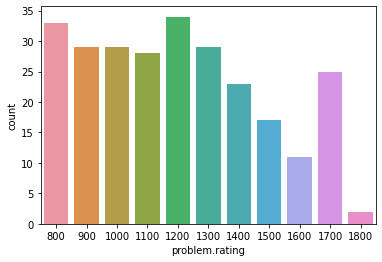

In [23]:
sns.countplot(x=df['problem.rating'])

<AxesSubplot:xlabel='passedTestCount', ylabel='count'>

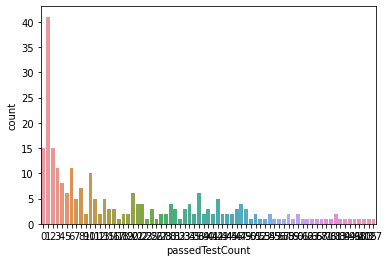

In [26]:
sns.countplot(x=df['passedTestCount'])

In [25]:
df[['testset', 'passedTestCount']]

,testset,passedTestCount
0,TESTS,0
1,TESTS,46
2,TESTS,2
3,TESTS,47
4,TESTS,1
...,...,...
255,PRETESTS,1
256,PRETESTS,0
257,TESTS,45
258,TESTS,0


In [14]:
df['problem.type'].unique()

array(['PROGRAMMING'], dtype=object)